In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp
from matplotlib.lines import Line2D

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

In [61]:
def CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, Km1, Km2, Km3, Km4, Dt, Et, ACt, PDEt):
    cAMP, PDEp = x
    def G(u, v, J, K): # equation (4)
            numerator = 2 * u * K # numerator of the fraction
            den_1 = v - u + v * J + u * K # first part of the denominator
            den_2 = -4 * (v - u) * u * K # second part of the denominator
            radicand = den_1**2 + den_2 # expression under the square root
            denominator = den_1 + np.sqrt(radicand) # compute the entire denominator
            return numerator / denominator # compute and return the fraction


    #ACp = (2 * r1 * cAMP * Km2) / (r2 * Dt * (1 + Km1 / ACt) + r1 * cAMP * (1 + Km2 / ACt) + np.sqrt((r2 * Dt * (1 + Km1 / ACt) + r1 * cAMP * (1 + Km2 / ACt)) ** 2 + 4 * (r1 * cAMP - r2 * Dt) ** 2))


    dPDEp  = r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)

    dcAMP = (k1*(ACt*G(r1*cAMP, r2*Dt, Km1/ACt, Km2/ACt))) - (k3 + k2 * PDEp) * cAMP
    return np.array([dcAMP, dPDEp])

k0, k1, k3, k2 = 0.0, 4.32, 0.58, 3.73
r1, r2, r3, r4 = 0.98, 4.48, 0.1, 0.14
Km1, Km2, Km3, Km4 = 2.48, 3.34, 9.24, 7.24
Dt, Et =  2.12, 1.6
ACt = 6.68
PDEt = 4.64
ACp = 0.0

def plot_nullclines(k1, k3, k2, r1, r2, r3, r4, Km1, Km2, Km3, Km4, Dt, Et, ACt, PDEt):
    cAMP_vals = np.linspace(-100, 100, 10000)
    dACp_vals = np.linspace(-100, 100, 10000)
    cAMP_grid, dACp_grid = np.meshgrid(cAMP_vals, dACp_vals)

    t = 0
    x = np.array([cAMP_grid, dACp_grid])
    nullclines = CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, Km1, Km2, Km3, Km4, Dt, Et, ACt, PDEt)
    plt.figure(figsize=(8, 6))
    plt.contour(dACp_grid,cAMP_grid, nullclines[0], levels=[0], colors='#1f77b4', linestyles='solid')
    plt.grid(linestyle=':', color='lightgray')
    plt.contour(dACp_grid,cAMP_grid, nullclines[1], levels=[0], colors='green', linestyles='solid')
    plt.xlabel('cAMP')
    plt.ylabel('PDEp')

    # Create custom legend handles and labels
    custom_lines = [Line2D([0], [0], color='#1f77b4', lw=2),
                    Line2D([0], [0], color='green', lw=2)]
    plt.legend(custom_lines, ['cAMP', 'PDEp', 'Fixed point (0,0,0)'])
    plt.title(f'2D nullclines')
    #plt.ylim(-3, 20)
    #plt.xlim(-1.5,20)
    #plt.ylim(-30, 30)
    #plt.xlim(-30,30)
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig(f'Nullclines_for_ACp_and_cAMP_with_PDEp_fixed_at_{ACp}.png', dpi=300)
    plt.show()

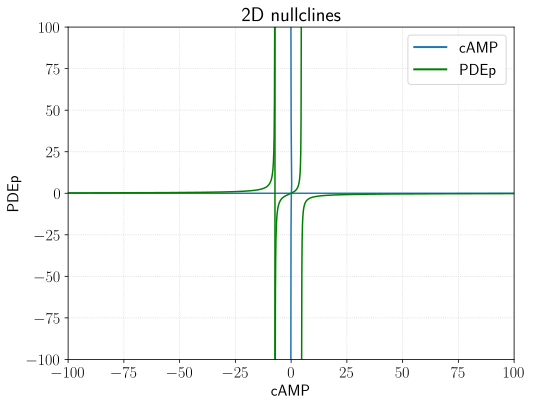

In [62]:
plot_nullclines(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64)

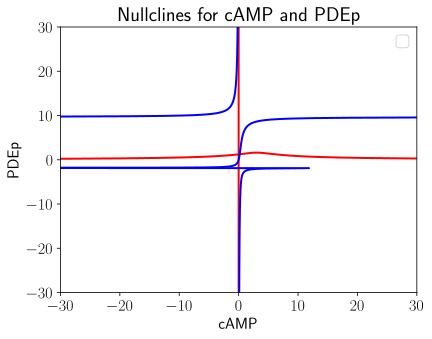

In [65]:
import numpy as np
import matplotlib.pyplot as plt

k1, k3, k2 = 9.18, 0.12, 10
r1, r2, r3, r4 = 2.04, 9.34, 0.56, 1.84
Km1, Km2, Km3, Km4 = 0.46, 9.34, 1.26, 0.18
Dt, ACt = 1.26, 10
PDEt, Et = 9.66, 2.04

def G(u, v, J, K):
    numerator = 2 * u * K
    den_1 = v - u + v * J + u * K
    den_2 = -4 * (v - u) * u * K
    radicand = den_1**2 + den_2
    denominator = den_1 + np.sqrt(radicand)
    return numerator / denominator

def nullclines(cAMP_range, PDEp_range):
    cAMP_mesh, PDEp_mesh = np.meshgrid(cAMP_range, PDEp_range)

    dcAMP = k1 * ACt * G(r1 * cAMP_mesh, r2 * Dt, r1 / ACt, r2 / ACt) - (k3 + k2 * PDEp_mesh) * cAMP_mesh
    dPDEp = r3 * cAMP_mesh * ((PDEt - PDEp_mesh) / r3) - r4 * Et * PDEp_mesh / (r4 + PDEp_mesh)

    return cAMP_mesh, PDEp_mesh, dcAMP, dPDEp

cAMP_range = np.linspace(-30, 30, 1000)
PDEp_range = np.linspace(-30, 30, 1000)

cAMP_mesh, PDEp_mesh, dcAMP, dPDEp = nullclines(cAMP_range, PDEp_range)

plt.figure()
plt.contour(cAMP_mesh, PDEp_mesh, dcAMP, levels=[0], colors='r', linestyles='solid', linewidths=2)
plt.contour(cAMP_mesh, PDEp_mesh, dPDEp, levels=[0], colors='b', linestyles='solid', linewidths=2)
plt.xlabel('cAMP')
plt.ylim(-30,30)
plt.xlim(-30,30)
plt.ylabel('PDEp')
plt.title('Nullclines for cAMP and PDEp')
plt.legend(['dcAMP/dt = 0', 'dPDEp/dt = 0'])
plt.show()
